<a href="https://colab.research.google.com/github/SahilJin123/DeepLearning/blob/main/Data_Augmentation_To_Address_OverFitting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import PIL
import tensorflow as tf

from tensorflow import keras 
from tensorflow.keras import models,layers

In [ ]:
!wget "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"

--2022-07-11 11:51:33--  https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.68.128, 142.251.10.128, 142.251.12.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.68.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 228813984 (218M) [application/x-compressed-tar]
Saving to: ‘flower_photos.tgz’

flower_photos.tgz   100%[===================>] 218.21M   269MB/s    in 0.8s    

2022-07-11 11:51:34 (269 MB/s) - ‘flower_photos.tgz’ saved [228813984/228813984]



In [ ]:
!tar -xvf  '/content/flower_photos.tgz'


flower_photos/
flower_photos/roses/
flower_photos/roses/14810868100_87eb739f26_m.jpg
flower_photos/roses/1446090416_f0cad5fde4.jpg
flower_photos/roses/15319767030_e6c5602a77_m.jpg
flower_photos/roses/15032112248_30c5284e54_n.jpg
flower_photos/roses/7211616670_2d49ecb3a5_m.jpg
flower_photos/roses/15674450867_0ced942941_n.jpg
flower_photos/roses/17158274118_00ec99a23c.jpg
flower_photos/roses/14019883858_e5d2a0ec10_n.jpg
flower_photos/roses/8035908422_87220425d2_n.jpg
flower_photos/roses/14747962886_2bff6bb323_m.jpg
flower_photos/roses/4356781875_92c5cd93c0.jpg
flower_photos/roses/8524505546_b242bd4928_n.jpg
flower_photos/roses/9406573080_60eab9278e_n.jpg
flower_photos/roses/6039330368_c30ed224c4_m.jpg
flower_photos/roses/14414100710_753a36fce9.jpg
flower_photos/roses/3292434691_392071d702_n.jpg
flower_photos/roses/5273722065_c85d8543c2_m.jpg
flower_photos/roses/2215318403_06eb99176a.jpg
flower_photos/roses/172311368_49412f881b.jpg
flower_photos/roses/15255964454_0a64eb67fa.jpg
flower_pho

In [ ]:
import pathlib
import glob

In [ ]:
imgList =[]

for images in glob.glob('/content/flower_photos/*/*.jpg'):
  imgList.append(images)


In [ ]:
imgCount=print(len(imgList))

3670


In [ ]:
roses = []
for images in glob.glob('/content/flower_photos/roses/*.jpg'):
  roses.append(images)

roses[:5]

['/content/flower_photos/roses/12243069253_e512464095_n.jpg',
 '/content/flower_photos/roses/14880561916_79aeb812fd_n.jpg',
 '/content/flower_photos/roses/1469726748_f359f4a8c5.jpg',
 '/content/flower_photos/roses/15319767030_e6c5602a77_m.jpg',
 '/content/flower_photos/roses/12165480946_c4a3fe182d_n.jpg']

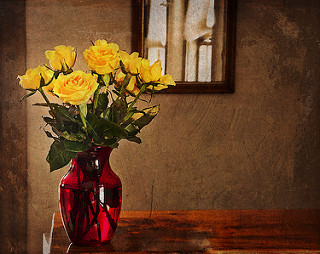

In [ ]:
PIL.Image.open(str(roses[0]))

In [ ]:
tulips = []
for images in glob.glob('/content/flower_photos/tulips/*.jpg'):
  tulips.append(images)

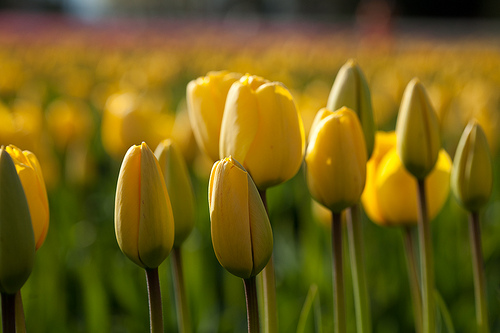

In [ ]:
PIL.Image.open(str(tulips[100]))

In [ ]:
sunflowers = []
for images in glob.glob('/content/flower_photos/sunflowers/*.jpg'):
  sunflowers.append(images)

In [ ]:
dandelion = []
for images in glob.glob('/content/flower_photos/dandelion/*.jpg'):
  dandelion.append(images)

In [ ]:
daisy = []
for images in glob.glob('/content/flower_photos/daisy/*.jpg'):
  daisy.append(images)

In [ ]:
flowers_image_dictionary = {
    'roses':roses,
    'daisy':daisy,
    'dandelion':dandelion,
    'sunflowers':sunflowers,
    'tulips':tulips,
}

In [ ]:
flowers_labels_dictionary = {
    'roses':0,
    'daisy':1,
    'dandelion':2,
    'sunflowers':3,
    'tulips':4,
}

In [ ]:
x =[]
y=[]
for flower_name,images in flowers_image_dictionary.items():
  for image in images:
    img = cv2.imread(image)
    resized_img = cv2.resize(img,(180,180))
    x.append(resized_img)
    y.append(flowers_labels_dictionary[flower_name])

In [ ]:
x = np.array(x)
y = np.array(y)

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state =0)

In [ ]:
x_train = x_train/255
x_test = x_test/255

In [ ]:
from tensorflow.keras import Sequential

**Without Data Augmentation**

In [ ]:
model =Sequential(
    [
      layers.Conv2D(64,3,activation='relu',padding = 'same'),
      layers.MaxPool2D(),
      layers.Conv2D(32,3,activation='relu',padding = 'same'),
      layers.MaxPool2D(), 
      layers.Flatten(),
      layers.Dense(128,activation ='relu'),
      layers.Dense(5,activation ='softmax')
    ]
)

model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics =['accuracy']
)

In [ ]:
model.fit(x_train,y_train,epochs = 10)

Epoch 1/10
86/86 [==============================] - 174s 2s/step - loss: 1.2968 - accuracy: 0.4658
Epoch 2/10
86/86 [==============================] - 171s 2s/step - loss: 0.9504 - accuracy: 0.6374
Epoch 3/10
86/86 [==============================] - 169s 2s/step - loss: 0.6353 - accuracy: 0.7696
Epoch 4/10
86/86 [==============================] - 171s 2s/step - loss: 0.3369 - accuracy: 0.8910
Epoch 5/10
86/86 [==============================] - 172s 2s/step - loss: 0.1708 - accuracy: 0.9499
Epoch 6/10
86/86 [==============================] - 173s 2s/step - loss: 0.0639 - accuracy: 0.9840
Epoch 7/10
86/86 [==============================] - 175s 2s/step - loss: 0.0391 - accuracy: 0.9906
Epoch 8/10
86/86 [==============================] - 176s 2s/step - loss: 0.0465 - accuracy: 0.9884
Epoch 9/10
86/86 [==============================] - 187s 2s/step - loss: 0.0552 - accuracy: 0.9858
Epoch 10/10
86/86 [==============================] - 182s 2s/step - loss: 0.0728 - accuracy: 0.9793


In [ ]:
# when there is big difference b/w accuracy of tested and training dataset
# calculated using fit and evaluate function than there is a problem of overfittig

model.evaluate(x_test,y_test)

29/29 [==============================] - 14s 464ms/step - loss: 1.8454 - accuracy: 0.5948


[1.8454322814941406, 0.5947712659835815]

In [ ]:
y_predict = model.predict(x_test)

In [ ]:
np.argmax(y_predict[0])

1

In [ ]:
y_test[0]

1

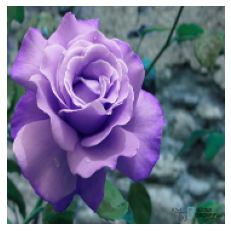

In [ ]:
plt.axis('off')
plt.imshow(x[0])

In [ ]:
data_augmentation(x[0])

In [ ]:
data_augmentation(x)[0]

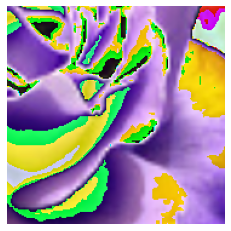

In [ ]:
plt.axis('off')
plt.imshow(data_augmentation(x)[0].numpy().astype('uint8'))

**With Data Augmentation**

In [ ]:
#to solve the problem of overfitting
data_augmentation = keras.Sequential(
    [
     layers.experimental.preprocessing.RandomFlip('horizontal',input_shape = (180,180,3)),
     layers.experimental.preprocessing.RandomRotation(0.1),

     layers.experimental.preprocessing.RandomZoom(0.1),
     layers.experimental.preprocessing.RandomContrast(0.3)
    ]
)

In [ ]:
model =Sequential(
    [
      data_augmentation,
      layers.Conv2D(16,3,activation='relu',padding = 'same'),
      layers.MaxPool2D(),
      layers.Conv2D(64,3,activation='relu',padding = 'same'),
      layers.MaxPool2D(), 
      layers.Conv2D(16,3,activation='relu',padding = 'same'),
      layers.MaxPool2D(), 
      layers.Dropout(0.2),
      layers.Flatten(),
      layers.Dense(128,activation ='relu'),
      layers.Dense(5,activation ='softmax')
    ]
)

model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics =['accuracy']
)

In [ ]:
model.fit(x_train,y_train,epochs =30)

Epoch 1/30
86/86 [==============================] - 4s 28ms/step - loss: 1.3223 - accuracy: 0.4150
Epoch 2/30
86/86 [==============================] - 2s 28ms/step - loss: 1.1192 - accuracy: 0.5320
Epoch 3/30
86/86 [==============================] - 2s 28ms/step - loss: 1.0591 - accuracy: 0.5701
Epoch 4/30
86/86 [==============================] - 2s 28ms/step - loss: 1.0218 - accuracy: 0.5807
Epoch 5/30
86/86 [==============================] - 2s 28ms/step - loss: 0.9768 - accuracy: 0.6083
Epoch 6/30
86/86 [==============================] - 2s 27ms/step - loss: 0.9348 - accuracy: 0.6279
Epoch 7/30
86/86 [==============================] - 2s 28ms/step - loss: 0.8750 - accuracy: 0.6508
Epoch 8/30
86/86 [==============================] - 2s 28ms/step - loss: 0.8741 - accuracy: 0.6453
Epoch 9/30
86/86 [==============================] - 2s 28ms/step - loss: 0.8198 - accuracy: 0.6675
Epoch 10/30
86/86 [==============================] - 2s 28ms/step - loss: 0.8015 - accuracy: 0.6795
Epoch 11/

In [ ]:
model.evaluate(x_test,y_test)

29/29 [==============================] - 1s 19ms/step - loss: 0.7810 - accuracy: 0.7233


[0.7810215950012207, 0.7233115434646606]

In [ ]:
y_predict = model.predict(x_test)

In [ ]:
np.argmax(y_predict[0])

1

In [ ]:
y_test[0]

1